Laboratory Work 1: Image Preprocessing with OpenCV

(Variant 2)

Objective: the purpose of this laboratory work is to study the main image preprocessing techniques used in computer vision. Students will learn how to load, transform, analyze, and visualize images using OpenCV and Matplotlib, and understand how preprocessing affects pixel values and image structure.


# ============================================================
# Task 1. Environment setup and image import
# ============================================================


In [1]:
#importing all neccessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

Mounted at /content/drive
Image shape: (345, 480, 3)
Num of channels: 3
Data type: uint8


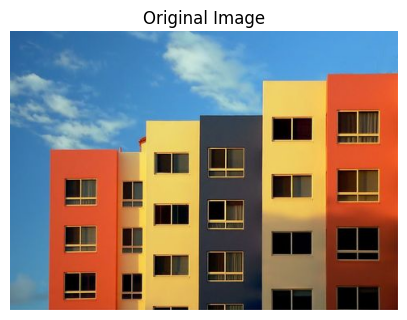

In [2]:
#importing an image that I chose. Why did I chose bright buildings in front of blue sky? Because it would beautifully demonstrate tasks in this lab work
# also if you ask, why are you trying to mount google drive, then the answer is because I am using google drive as repository. I chose this variant because I can sync it with my laptop and push it to github when and if needed

drive.mount('/content/drive')

#now I will read my image which I will derive from this said google drive

img_path = '/content/drive/MyDrive/CV-Spring-2026/lab1/images/ColorfulBuildingBlueSky.jpg'
image = cv2.imread(img_path)

#now I will check if image was loaded correctly, just in case
if image is None:
  raise ValueError('Unfortunately image was not found, check your path')

#now lets print the most basic information about the image:
print('Image shape:', image.shape)
print('Num of channels:', image.shape[2])
print('Data type:', image.dtype)

#and now lets display the image itself, so that you can see it too

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

I will explain what I did in the code cell above, so:

- image.shape will show us the height, width, number of channels of the image. I didn't know what is a 'channel', so here is the explanation from google. Image channels refer to the individual components of color in an image, where each channel is typically assigned a specific intensity value, such as red, green, or blue (RGB), contributing to the overall color representation in a 24-bit image.

- in my own words number of channels indicates that the image is a color image (3 channels)

- uint8 means pixel values are stored in the range [0, 255]

# ============================================================
# Task 2. Color space processing
# ============================================================

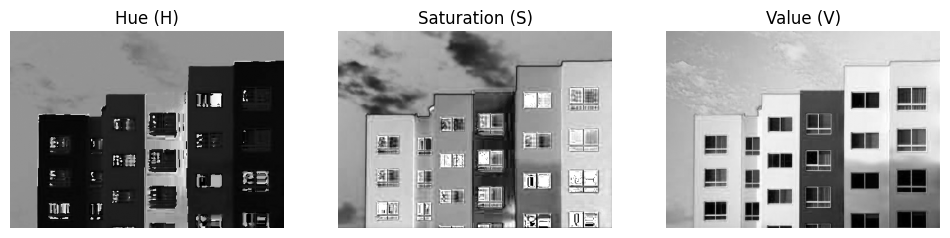

In [3]:
#now I will convert image from BRG to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#and now I will convert image from RGB to HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

#Visualize each HSV channel separately
h, s, v = cv2.split(image_hsv)

#lets now visualise HSV channels
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue (H)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation (S)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value (V)')
plt.axis('off')

plt.show()

I will now explain what I did in the code cell above:
- RGB is intuitively R-red, G-green, B-blue
- I didn't know what is HSV, so from what I understood: HSV separates color information (Hue) from intensity (Value), which makes it more useful for tasks like segmentation and illumination-invariant analysis. HSV stands for hue, saturation and value

# ============================================================
# Task 3. Image transformation
# ============================================================

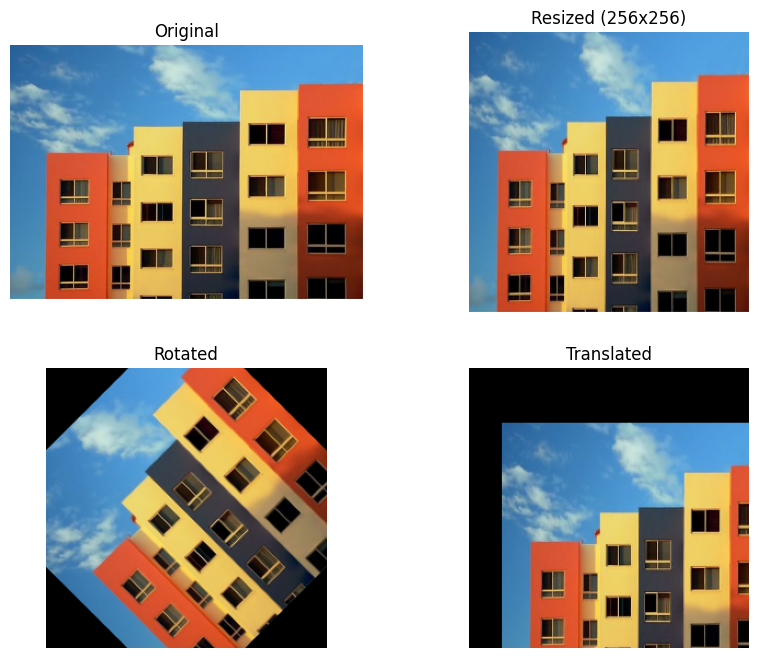

In [4]:
#resizing the image to 256x256
resized = cv2.resize(image_rgb, (256, 256)) #simple as that

#rotation
(h_img, w_img) = resized.shape[:2] #getting the image dimesions
center = (w_img // 2, h_img // 2) #defining the center of the rotation, why? because we will rotate the image around the center
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0) #here we are making 2x3 affine transformation matrix
rotated = cv2.warpAffine(resized, rotation_matrix, (w_img, h_img)) #and here we are applying rotation

#translation
translation_matrix = np.float32([[1, 0, 30], [0, 1, 50]]) #moving the image 30 pixels to the right, 50 pixels down
translated = cv2.warpAffine(resized, translation_matrix, (w_img, h_img)) #and here we are spplying that said translation

#now lets display results and see
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(resized)
plt.title('Resized (256x256)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(rotated)
plt.title('Rotated')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(translated)
plt.title('Translated')
plt.axis('off')

plt.show()

Explanation of the code cell above:

-In this task I have applied transformation to the image. Resized it, rotated by 45 degrees around its center using this thing called affine transoformation. I applied translation, I didn't know what is translation, it is like dragging the image on the screen. I shifted the image horizontally and vertically without changing the shape


# ============================================================
# Task 4. Contrast enhancement and normalization
# ============================================================

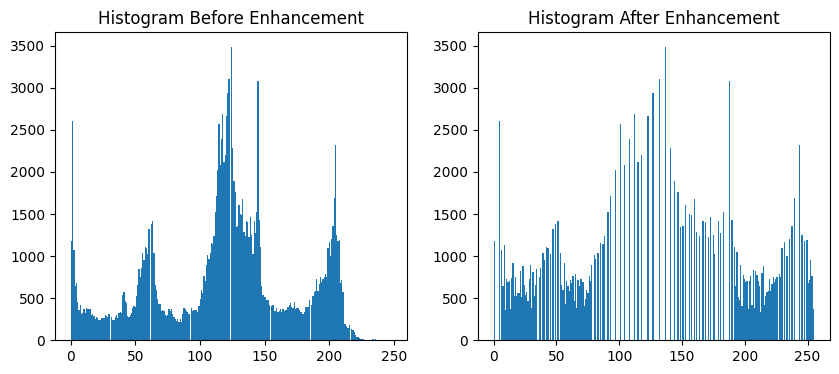

In [5]:
#we will convert to grayscale for histogram operations
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#we will do equalization of the histogram
enhanced = cv2.equalizeHist(gray)

#and now we will normalize pixel value to range [0,1]
normalized = enhanced / 255.0

#and finally something visual, something that we can see: plotting the histogram
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(gray.ravel(), bins=256)
plt.title('Histogram Before Enhancement')

plt.subplot(1, 2, 2)
plt.hist(enhanced.ravel(), bins=256)
plt.title('Histogram After Enhancement')

plt.show()

Explanation of the code cell above, it will be very detailed, because I wanted to understand deeply:

- So why do we convert to grayscale, in my code we are taking a color image (BRG) and we convert it into a single-channel image, which is 'grayscale'. So each pixel is becoming one number, not three. Why do we need it? Because histogram equalization works with 'intensity', not color. So grayscale is basically 'how bright is each pixel'

- I didn't know what is histogram in images, so here it is: We should understand 'Image' as 'matrix of numbers', so each pixel has a value from 0 to 255, where 0 is black and 255 is white. 'Histogram' is how often each brightness value appears. X-axis is the pixel intensity, Y-axis is number of pixels with that intensity

- The core idea of this task was the 'Histogram Equalization'. Here we are basically redistributing pixel intensities and spreading them more evenly across full range. Visually it is easier to understand, dark areas become darker and bright areas become brighter, contrast increases. So it is making existing differences more visible

- Here also is my first time using .ravel() function, what it does is it is converting 2d image into 1d array. For histogram we need only list of values, we dont need matrix, so that is why we use it. We normalized data to be suitable in [0,1] range, so in the future we can process it

# ============================================================
# Task 5. Noise filtering and edge detection
# ============================================================

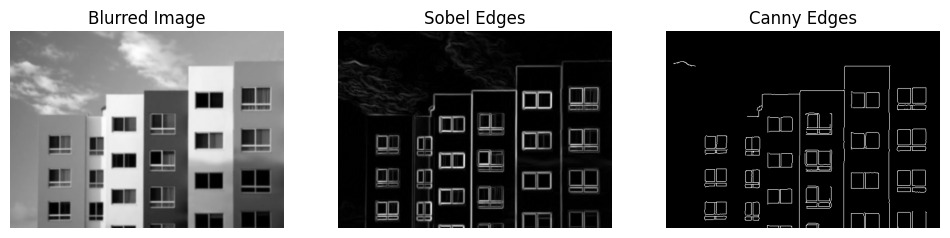

In [6]:
#first, lets apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#now, lets do edge detection
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize = 3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize = 3)
sobel = cv2.magnitude(sobel_x, sobel_y)

#canny edge detection
canny = cv2.Canny(blurred, 100, 200)

#lets display our results
plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edges')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')


plt.show()

- Gaussian blur is literally blurring, it kind of smoothes the image. It replaces each pixel with a weighted average of its neighbours, and also important fact that I found is that pixels close to the center have higher weight (it is called Gaussian distribution). In my code (5, 5) is Kernel size, bigger kernel - stronger blur, smaller kernel - weaker blur

- Second thing that we did was Sobel Edge Detection, first we computed horizontal edges, or in other words x-direction. This line of code computes how much pixel intensity changes from the left to the right, it detects 'vertical edges'

- Then we computed vertical edges, or y-direction, it computes how much pixel intensity changed from top to the bottom, also it detects 'horizontal edges'

- After finding out this x-direction and y-direction, we combine them both. Here the formula computes the gradient magnitude. $|G| = \sqrt{G_x^2 + G_y^2}$

- Why in the first place we blurred, and then found edges? Because noise in the image can look like fake edges. So blur makes edges smoother, more kind of continuous, more meaningful.

- Now lets talk about Canny edge detection. As far as I understood, Canny is not a filter, it is multistep algorithm. In my code 100 and 200 is lower threshold and upper threshold. It keeps only edges that are strong, so if it is higher that 200, then we keed it, if lower than 100, then we discard it, if there are some edges that are between 100 and 200: then we keep only that edges that are connected to strong ones. Summing up, Canny removes noise and keeps only meaningful edges

# ============================================================
# Task 6. Binary image and object extraction
# ============================================================

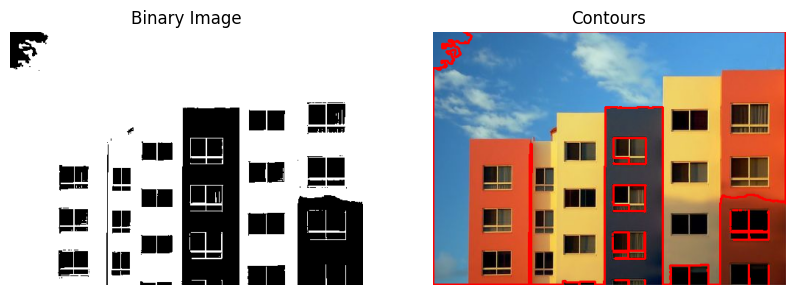

In [7]:
#now we will convert the image to binary using thresholding. I will be using Otsu's method
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#now we will extract the contours of the object
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#and lets draw contours on the copy of the image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)

#displaying the binary image and contours
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title('Contours')
plt.axis('off')

plt.show()


In [8]:
#separate code cell for saving images

import os
save_dir = '/content/drive/MyDrive/CV-Spring-2026/lab1/images'

cv2.imwrite(os.path.join(save_dir, 'enhanced_image.jpg'), enhanced)
cv2.imwrite(os.path.join(save_dir, 'edges_canny.jpg'), canny)
cv2.imwrite(os.path.join(save_dir, 'binary_image.jpg'), binary)

True

  - At first I didn't understand what was thresholding in this task, turned out it was turning image into two values only, so 0 is black, 255 is white. Otsu;s method that I used was choosing threshold automatically, so I passed 0 as threshold. Otsu's method looks at the grayscale histogram, and then it finds a threshold that best separates background pixels and foreground pixels. It originally makes an assumption, that image has two parts: background and the object.

  - Binary image is black and white image, so shapes become very clear, and you can separate objects, it is needed in our case to find contours

  - Contour as a concept in this lab work is 'a sequence of points that form the boundary of an object', kind of tracing the outline of an object with a pen. Previously we made binary image just for that, it becomes perfect 'input' for finding contours.

  - cv2.RETR_EXTERNAL retrieves only outer contours, it doesn't take contours inside of the contours, good for counting objects. cv2.CHAIN_APPROX_SIMPLE removes redundant points, it does not store all pixels, only corners and changes of direction

  - contour_image → where to draw, contours → what to draw, -1 → draw all contours, (255, 0, 0) → blue color (RGB), 2 → thickness of lines

  - With contours we can compute such things as shape, area, perimeter, object count. Contours are also used for segmentation, tracking